# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
import csv
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Locking in a Random Seed
random.seed(30)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Identify the URL and the query url
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid="
query_url = url + weather_api_key +"&q="

# Empty lists to group data
city_name = []
Lat = []
Long = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

# Begin for loop, append relevant data and print log
print("Beginning Data Retrieval")
print("-"*30)
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print("Processing record |" + city)
        city_name.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Long.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
    except:
        print(city + " not found. Skipping...")
print("-"*30)
print("Ending Data Retrieval")
print("-"*30)

Beginning Data Retrieval
------------------------------
Processing record |orlik
Processing record |sunbury
Processing record |nelson bay
Processing record |merauke
Processing record |marcona
marcona not found. Skipping...
Processing record |port alfred
Processing record |barentsburg
barentsburg not found. Skipping...
Processing record |sabang
Processing record |suda
Processing record |albany
Processing record |veroli
Processing record |cape town
Processing record |mataura
Processing record |saldanha
Processing record |vaini
Processing record |punta arenas
Processing record |college
Processing record |bambous virieux
Processing record |ponta do sol
Processing record |busselton
Processing record |ushuaia
Processing record |faanui
Processing record |vilyuysk
Processing record |chokurdakh
Processing record |champerico
Processing record |port elizabeth
Processing record |krasnyy luch
Processing record |goderich
Processing record |tuatapere
Processing record |saleaula
saleaula not found. Sk

Processing record |khatanga
Processing record |alice springs
Processing record |gerede
Processing record |mahebourg
Processing record |cockburn town
Processing record |quzhou
Processing record |changping
Processing record |lolua
lolua not found. Skipping...
Processing record |koslan
Processing record |maceio
Processing record |paracuru
Processing record |cody
Processing record |umm kaddadah
Processing record |kangaatsiaq
Processing record |kuryk
Processing record |port lincoln
Processing record |byron bay
Processing record |norman wells
Processing record |rawson
Processing record |tsihombe
tsihombe not found. Skipping...
Processing record |bahia blanca
Processing record |broome
Processing record |bembereke
Processing record |ust-tsilma
Processing record |eyl
Processing record |dera din panah
dera din panah not found. Skipping...
Processing record |corlu
Processing record |salinopolis
Processing record |tanout
Processing record |coalinga
Processing record |eirunepe
Processing record |na

Processing record |turukhansk
Processing record |solnechnyy
Processing record |sao benedito do rio preto
Processing record |shache
Processing record |kargasok
Processing record |yichun
Processing record |luwuk
Processing record |north battleford
Processing record |san angelo
Processing record |balaipungut
Processing record |robertson
Processing record |temaraia
temaraia not found. Skipping...
Processing record |kentau
Processing record |yima
Processing record |koumac
Processing record |hiroshima
Processing record |deer lake
Processing record |urucurituba
Processing record |albert lea
Processing record |tanshui
tanshui not found. Skipping...
Processing record |huadian
Processing record |nacala
Processing record |bukene
Processing record |leningradskiy
Processing record |marale
Processing record |kavieng
Processing record |puerto maldonado
Processing record |itarema
Processing record |simpang
Processing record |lavrentiya
Processing record |katsuura
Processing record |tura
Processing rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Gather the data and convert into a dataframe
cities_dict = ({
    "City Name":city_name,
    "Latitude":Lat,
    "Longtitude":Long,
    "Max Temperature":Max_Temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Speed,
    "Country":Country,
    "Date":Date
})

cities_df=pd.DataFrame(cities_dict)
cities_df.head()

,City Name,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Orlik,52.5178,99.8250,19.41,46,100,0.94,RU,1659957415
1,Sunbury,-37.5833,144.7333,7.90,78,20,0.45,AU,1659957416
2,Nelson Bay,-32.7167,152.1500,14.49,77,11,4.92,AU,1659957417
3,Merauke,-8.4667,140.3333,25.59,77,40,7.78,ID,1659957417
4,Port Alfred,-33.5906,26.8910,17.88,90,91,3.13,ZA,1659957418


In [5]:
# Confirm output file and export data into a csv
output_csv='../output_data/cities.csv'

cities_df.to_csv(output_csv,header=True,index=False)
cities_df.describe()

,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02
mean,19.459843,17.241901,21.658311,69.731707,57.215760,3.602552,1.659958e+09
std,32.989353,90.936850,8.770183,22.335473,38.091258,2.472466,1.126806e+02
min,-54.800000,-175.200000,-4.520000,8.000000,0.000000,0.000000,1.659957e+09
25%,-6.216700,-60.838800,15.570000,59.000000,20.000000,1.760000,1.659957e+09
50%,22.285500,19.234500,24.090000,76.000000,70.000000,3.090000,1.659958e+09
75%,46.383400,98.833300,27.480000,87.000000,97.000000,4.710000,1.659958e+09
max,78.218600,179.316700,44.720000,100.000000,100.000000,14.680000,1.659958e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [6]:
#Confirming no cities have humidity over 100%.
humidity_over_100 = cities_df.loc[cities_df["Humidity"] > 100]
humidity_over_100.head()

,City Name,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

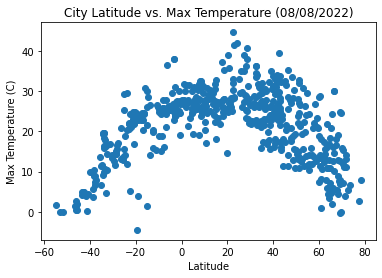

In [7]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temperature"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (08/08/2022)");
plt.savefig("../output_data/Fig 1")

The above scatter plot indicates that as cities get closer to the equator, where Latitude is 0, the Cities' Max Temperature is going to be hotter than cities further away from the equator. Additionally, it shows that for the date that the data was requested it was Summer in the Northern Hemispher as overall the cities above the Equator, where Latitude is greater than 0, are generally higher than the temperature of the cities below the Equator.

## Latitude vs. Humidity Plot

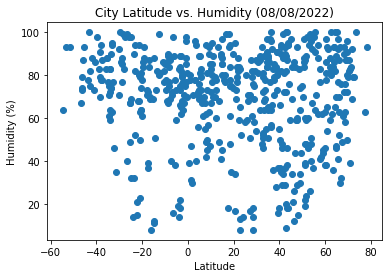

In [8]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (08/08/2022)");
plt.savefig("../output_data/Fig 2")

This scatter plot is analysing whether there is a relationship between the humidity of a city to its latitude. It seems that overall the sample cities have a humidity over 40% on the day the data is pulled.

## Latitude vs. Cloudiness Plot

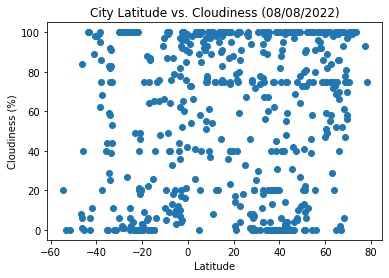

In [9]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (08/08/2022)");
plt.savefig("../output_data/Fig 3")

In this scatter plot the Cloudiness of the sample city is being plotted against the cities' Latitude. It seems that the Cloudiness is not correlated to the Latitude of the city.

## Latitude vs. Wind Speed Plot

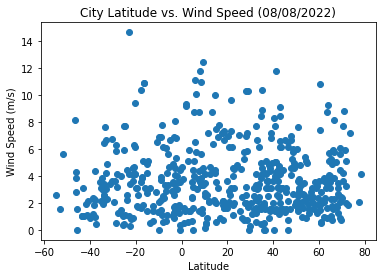

In [10]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (08/08/2022)");
plt.savefig("../output_data/Fig 4")

Above we are plotting Wind Speed against the Latitude of the sample cities.

## Linear Regression

In [11]:
# Create two dataframes for both hemispheres
northern_hemi = cities_df.loc[cities_df["Latitude"] > 0]
southern_hemi = cities_df.loc[cities_df["Latitude"] < 0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6262466555623246


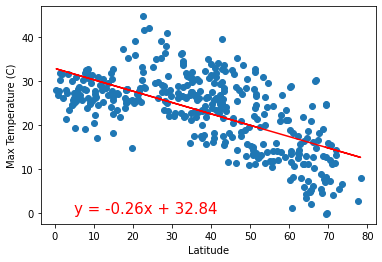

In [24]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=15,color="red")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

The above table is demonstrating the relationship between a cities Latitude and it's Max Temperature. The R-Value indicates a fairly strong relationship that the further north (a greater Latitude figure) the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.803359791940072


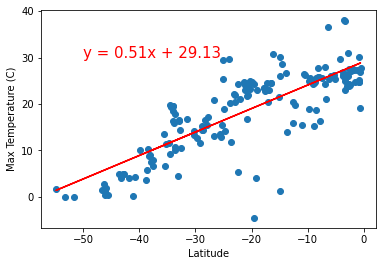

In [23]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

In comparison to the Northern Hemisphere, for the Southen Hemisphere the further south (a smaller Latitude figure) the temperature will get lower. The R-Value indicates a strong relationship between a Souther Hemisphere's city's Latitude and Max Temperature.

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02157559338863701


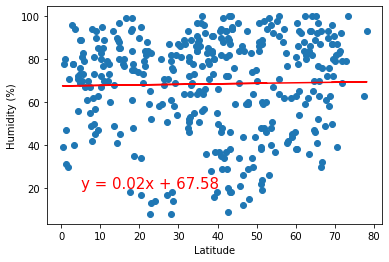

In [25]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

The above scatter plot shows a cities' Latitude to its Humidity. While there is a very slight positive linear regression the r-value is far too low to indicate a correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.1665267198639446


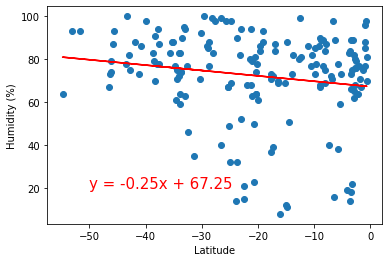

In [26]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

While the Northern Hemispher has a positive linear regression between Humidity and Latitude, the Southern Hemisphere has a negative linear regression. The r-value is greater but I believe this is due to the smaller sample size compared to the Northern Hemisphere.

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.016668342569532743


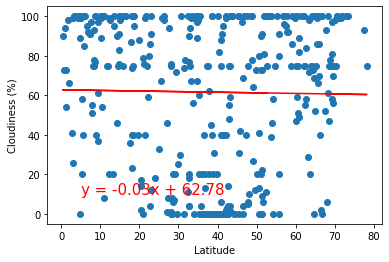

In [27]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0813657031794509


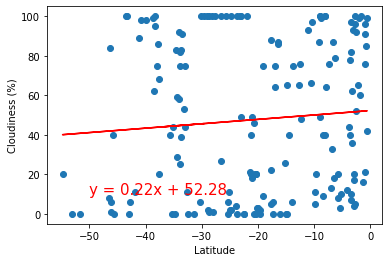

In [28]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

Both plots are plotting the relationship between a cities' Latitude and Cloudiness. In neither linear regression is there indication of a relationship between Latitude and Cloudiness.

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0983264826639464


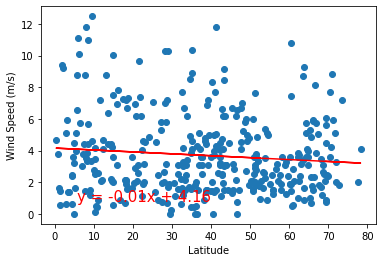

In [17]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.050940108939229074


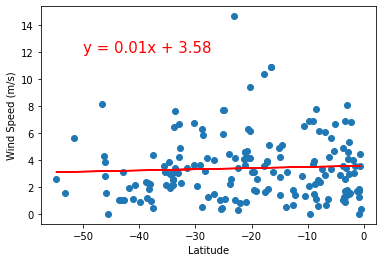

In [29]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

In the final pair of graphs, there is again no relationship between a cities' Wind Speed and Latitude as the r-value is very low. Both graphs have a very small slope so it seems that across the globa the windspeed is roughly the same.